# Biwi Kinect Head Pose Point Detection

## Import FastAI 

In [1]:
from fastai.vision.all import *

## Download Biwi Kinect Head Pose Dataset

In [2]:
path = untar_data(URLs.BIWI_HEAD_POSE)

In [3]:
path.ls()

(#50) [Path('/home/gurucharan/.fastai/data/biwi_head_pose/readme.txt'),Path('/home/gurucharan/.fastai/data/biwi_head_pose/17'),Path('/home/gurucharan/.fastai/data/biwi_head_pose/17.obj'),Path('/home/gurucharan/.fastai/data/biwi_head_pose/04'),Path('/home/gurucharan/.fastai/data/biwi_head_pose/01'),Path('/home/gurucharan/.fastai/data/biwi_head_pose/08.obj'),Path('/home/gurucharan/.fastai/data/biwi_head_pose/15'),Path('/home/gurucharan/.fastai/data/biwi_head_pose/15.obj'),Path('/home/gurucharan/.fastai/data/biwi_head_pose/07'),Path('/home/gurucharan/.fastai/data/biwi_head_pose/16.obj')...]

## Create DataLoaders

In [4]:
def img2pose(x): return Path(f'{str(x)[:-7]}pose.txt')

In [5]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)
def get_ctr(f):
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0] * cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1,c2])

In [6]:
biwi = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_ctr,
    splitter=FuncSplitter(lambda o: o.parent.name=='13'),
    batch_tfms=[*aug_transforms(size=(240,320)), 
                Normalize.from_stats(*imagenet_stats)]
)

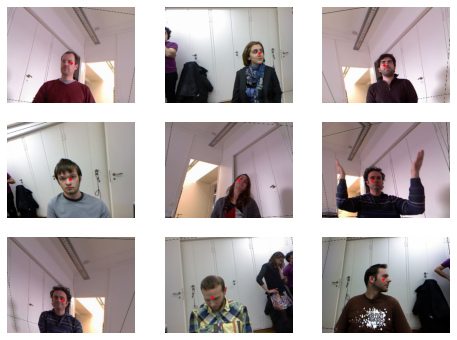

In [7]:
dls = biwi.dataloaders(path)
dls.show_batch(max_n=9, figsize=(8,6))

## Create Learner

In [8]:
learn = cnn_learner(dls, resnet18).to_fp16()

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.03981071710586548)

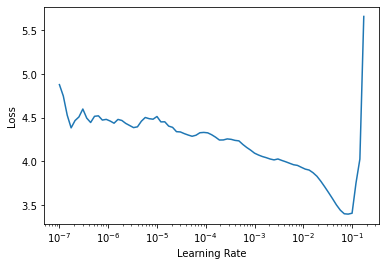

In [9]:
learn.lr_find()

In [10]:
learn.fit_one_cycle(4, 7e-3)

epoch,train_loss,valid_loss,time
0,0.205242,0.003310,01:12
1,0.034383,0.009504,01:13
2,0.017503,0.004196,01:14
3,0.008387,0.001400,01:14


## Verify results

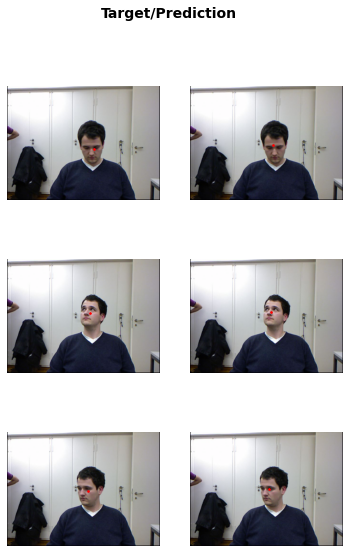

In [11]:
learn.show_results()

## Unfreeze the body and train

SuggestedLRs(lr_min=0.00014454397605732084, lr_steep=7.585775847473997e-07)

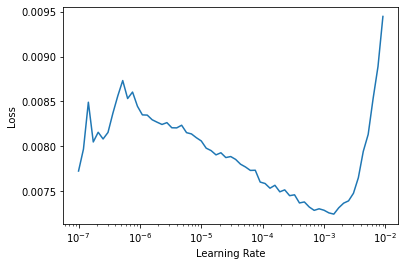

In [12]:
learn.unfreeze()
learn.lr_find()

In [13]:
learn.fit_one_cycle(4, slice(5e-5, 5e-4))

epoch,train_loss,valid_loss,time
0,0.003969,0.002343,01:30
1,0.002853,0.001281,01:30
2,0.001893,0.000087,01:32
3,0.001669,0.000186,01:33


## Verify results

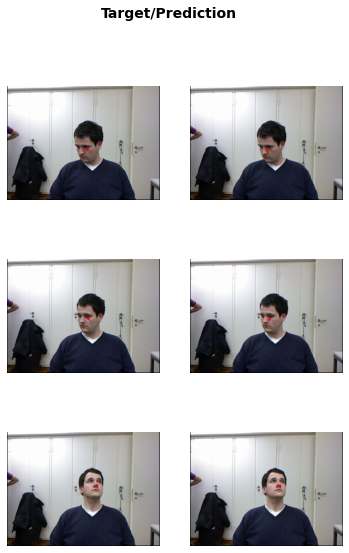

In [14]:
learn.show_results()